In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(" ")

(0 = Female, 1= Male)

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Exploratory Data Analysis

In [4]:
df.shape

(303, 14)

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

No missing values

In [7]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Continuous Variables

In [8]:
# list of continuous_features 
continuous_features = df[["age","trtbps","chol","thalachh","oldpeak"]]

print('Number of continuous_features: ', len(continuous_features.columns))

# visualise the continuous_features
continuous_features.head()

Number of continuous_features:  5


,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


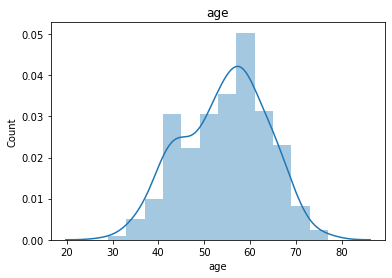

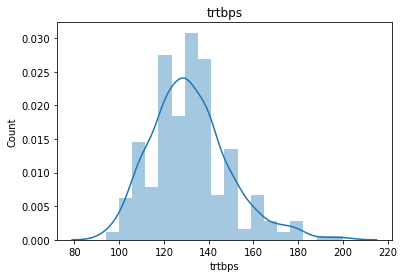

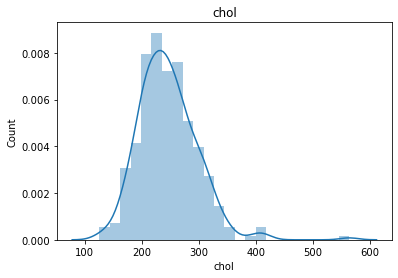

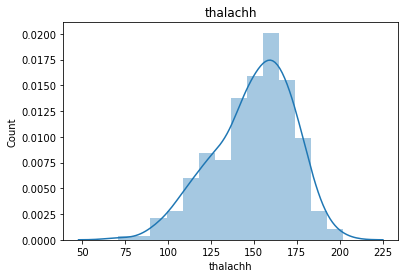

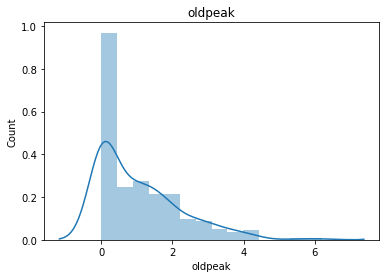

In [9]:
# Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_features:
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Categorical Variables

In [10]:
# list of categorical_features 
categorical_features = df[["sex","cp","fbs","restecg","exng","slp","caa","thall","output"]]

print('Number of categorical_features: ', len(categorical_features.columns))

# visualise the continuous_features
categorical_features.head()

Number of categorical_features:  9


,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1


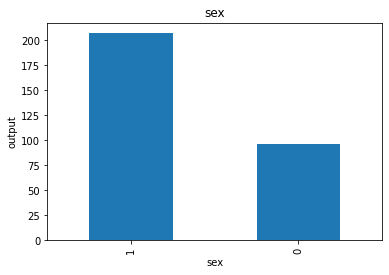

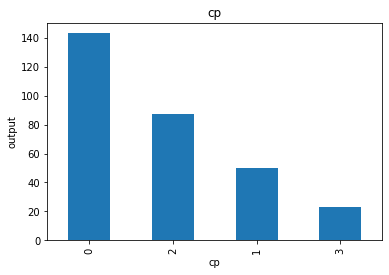

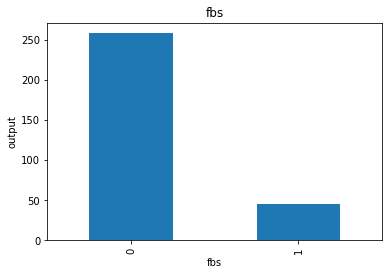

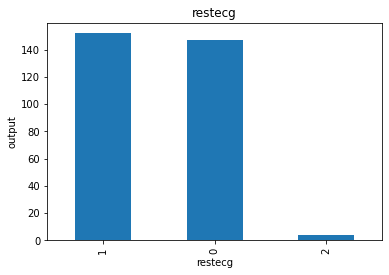

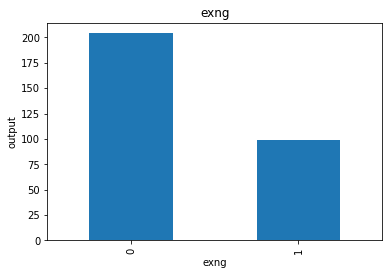

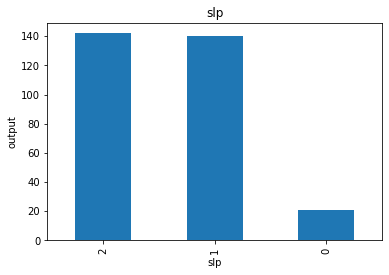

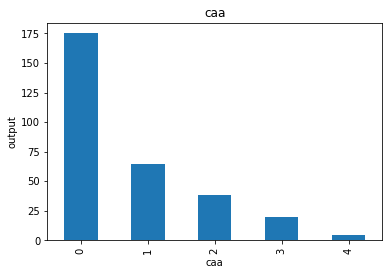

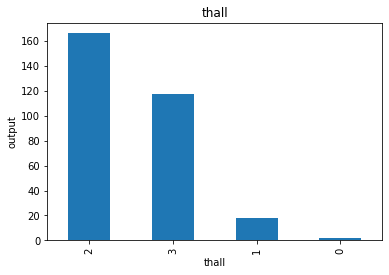

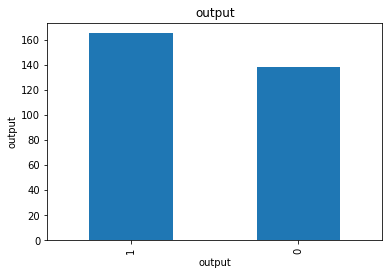

In [11]:
# Lets Find the distribution of categorical features

for feature in categorical_features:
    df[feature].value_counts().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('output')
    plt.title(feature)
    plt.show()

In [12]:
#checking for values

for feature in categorical_features:
    categorical_features.copy()
    print(feature)
    print(df[feature].value_counts())
    print("\n")

sex
1    207
0     96
Name: sex, dtype: int64


cp
0    143
2     87
1     50
3     23
Name: cp, dtype: int64


fbs
0    258
1     45
Name: fbs, dtype: int64


restecg
1    152
0    147
2      4
Name: restecg, dtype: int64


exng
0    204
1     99
Name: exng, dtype: int64


slp
2    142
1    140
0     21
Name: slp, dtype: int64


caa
0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64


thall
2    166
3    117
1     18
0      2
Name: thall, dtype: int64


output
1    165
0    138
Name: output, dtype: int64




### Checking correlation between continuous features

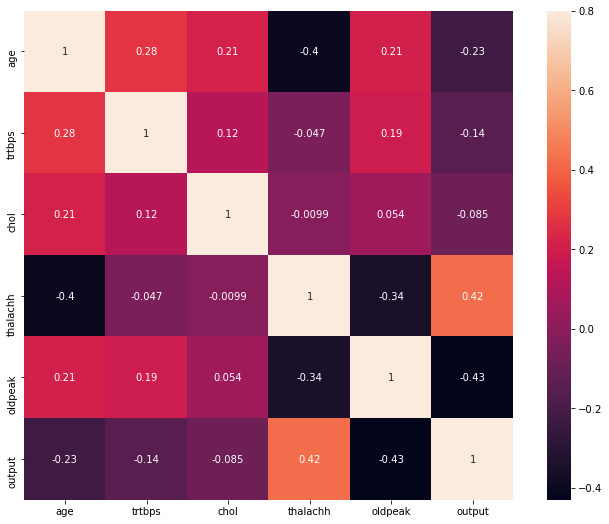

In [13]:
corrmat = pd.concat([continuous_features,df["output"]],axis=1).corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

### Checking correlation between categorical features

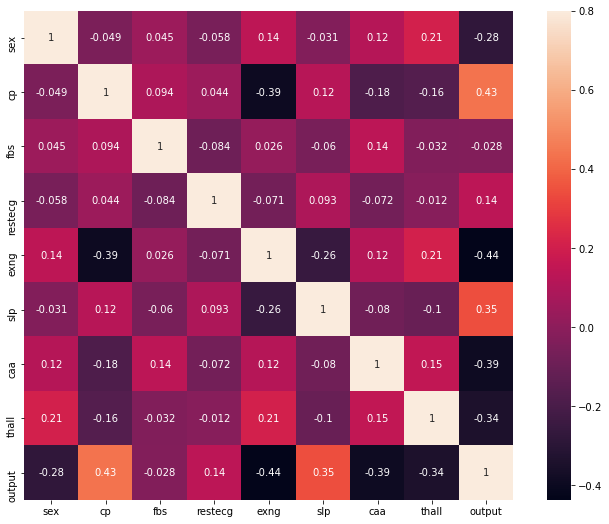

In [14]:
corrmat = categorical_features.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)

### Check for Outliers

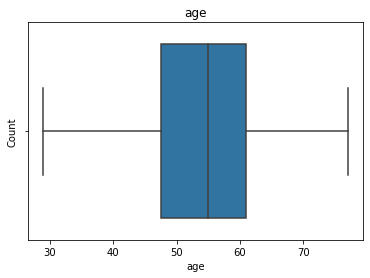

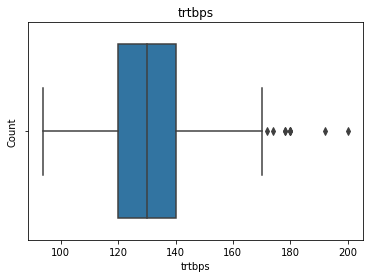

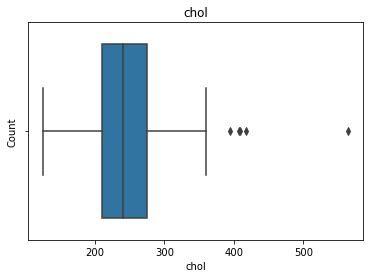

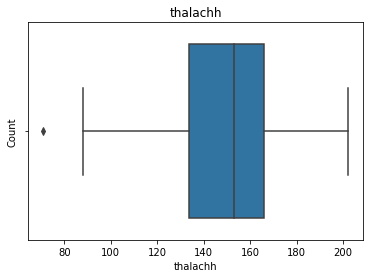

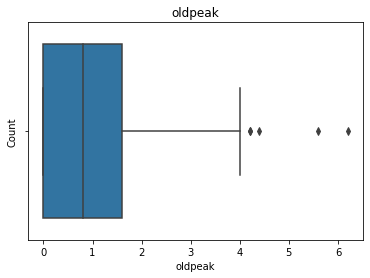

In [15]:
for feature in continuous_features:
    sns.boxplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Removing Outliers

#### chol

In [16]:
df[df["chol"] > 390]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


In [17]:
df = df.drop([28, 85, 96, 220, 246], axis=0)

In [18]:
df.shape

(298, 14)

#### oldpeak

In [19]:
df[df["oldpeak"] > 4]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0


In [20]:
df[df["oldpeak"] > 4].index

Int64Index([101, 204, 221, 250, 291], dtype='int64')

In [21]:
df = df.drop([101, 204, 221, 250, 291], axis=0)

In [22]:
df.shape

(293, 14)

#### thalachh

In [23]:
df[df["thalachh"] < 80]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [24]:
df[df["thalachh"] < 80].index

Int64Index([272], dtype='int64')

In [25]:
df = df.drop([272], axis=0)

In [26]:
df.shape

(292, 14)

#### trtbps

In [27]:
df[df["trtbps"] > 170]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0


In [28]:
df[df["trtbps"] > 170].index

Int64Index([8, 110, 203, 223, 241, 248, 260, 266], dtype='int64')

In [29]:
df = df.drop([8, 110, 203, 223, 241, 248, 260, 266], axis = 0)

In [30]:
df.shape

(284, 14)

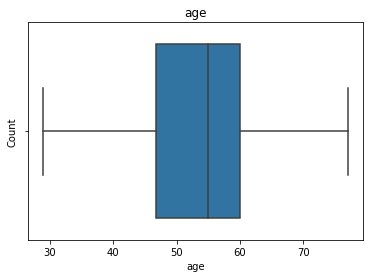

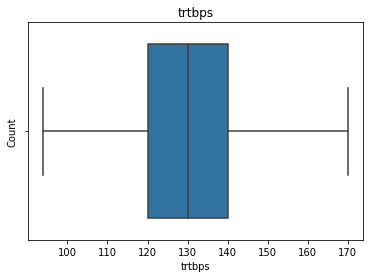

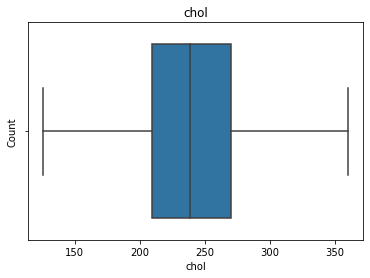

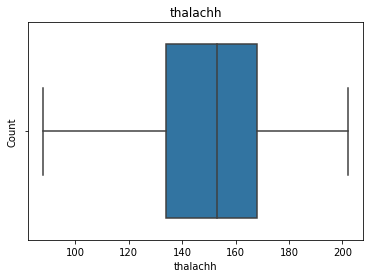

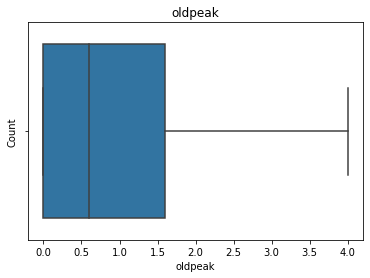

In [31]:
for feature in continuous_features:
    sns.boxplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

No outliers present. Let us check the distribution again without the outliers

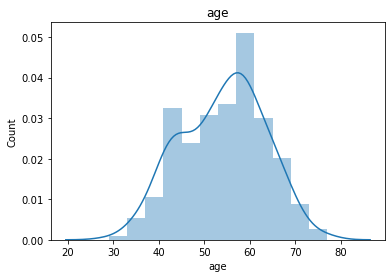

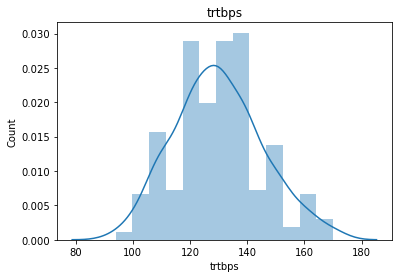

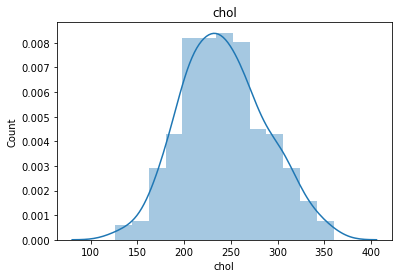

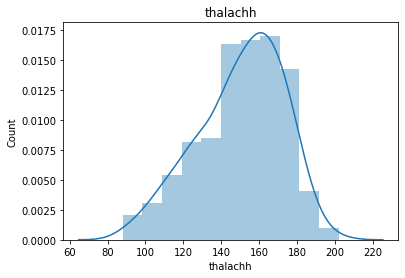

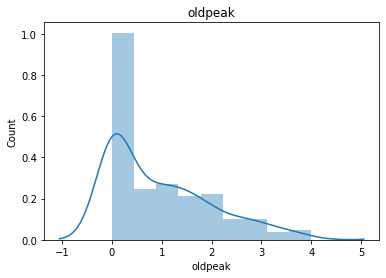

In [32]:
for feature in continuous_features:
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Relation between continuous variables and output

In [33]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


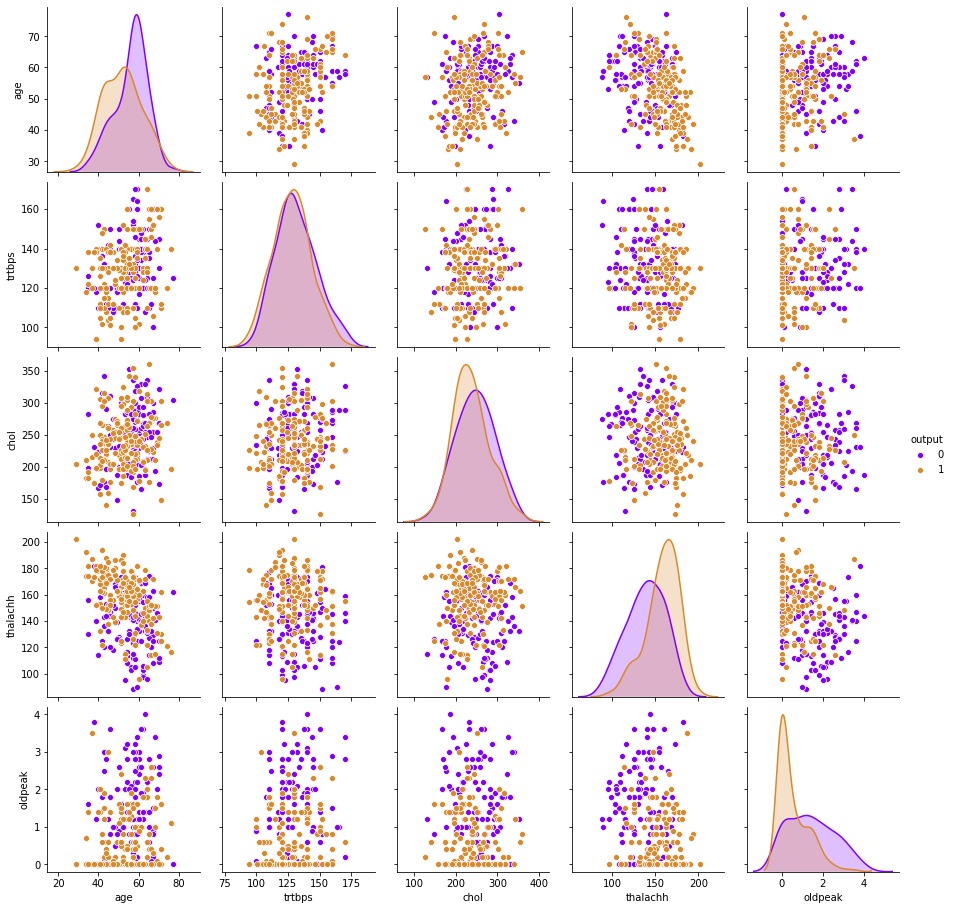

In [34]:
df1 = df[["age","trtbps","chol","thalachh","oldpeak","output"]]
sns.pairplot(df1,hue='output',palette = ["#8000ff","#da8829"])

### Relation between categorical variables and output

C:\Users\kartik\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\kartik\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\kartik\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


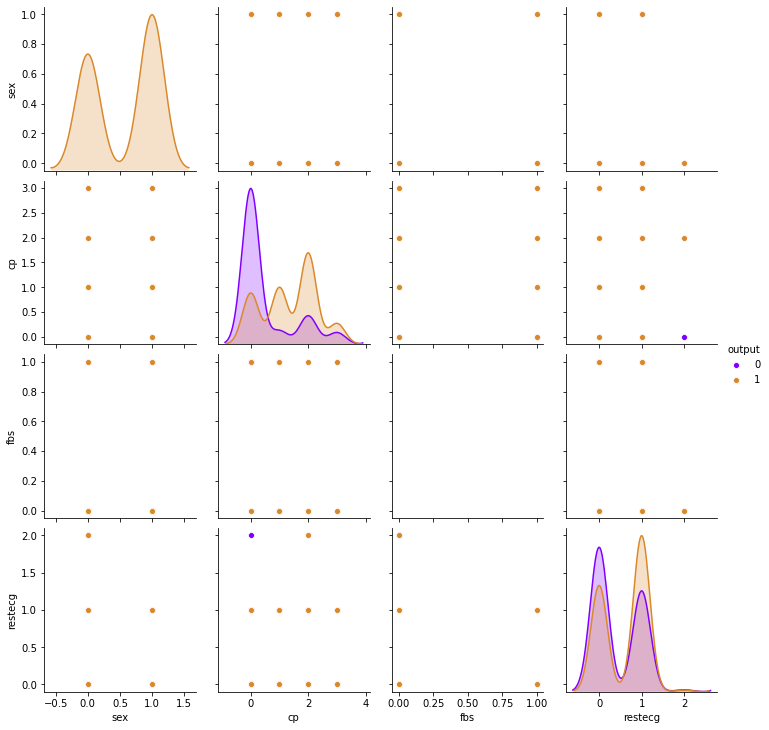

In [35]:
df2 = df[["sex","cp","fbs","restecg","output"]]
sns.pairplot(df2,hue='output',palette = ["#8000ff","#da8829"])

C:\Users\kartik\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\kartik\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\kartik\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


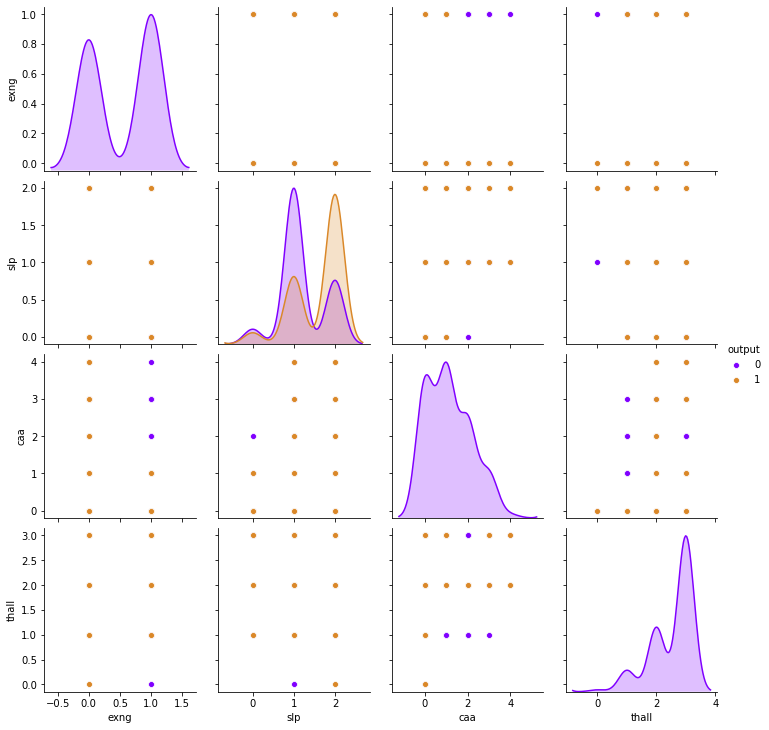

In [36]:
df3 = df[["exng","slp","caa","thall","output"]]
sns.pairplot(df3,hue='output',palette = ["#8000ff","#da8829"])

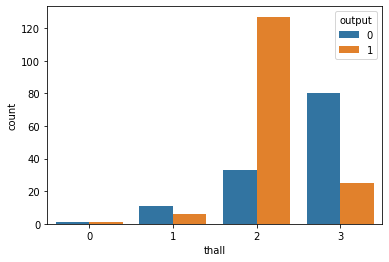

In [37]:
sns.countplot(x="thall",hue="output",data=df)

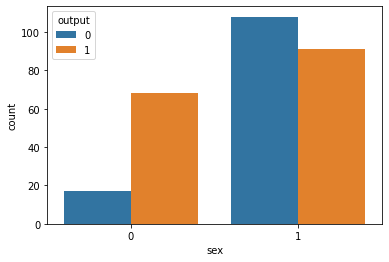

In [38]:
sns.countplot(x="sex",hue="output",data=df)

#### Adding dummies for categorical variables having more than 2 values

In [39]:
df_new =pd.get_dummies(df, columns = ["cp","restecg","slp","caa","thall"], drop_first = True)
df_new.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,output,cp_1,...,restecg_2,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,1,145,233,1,150,0,2.3,1,0,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,1,1,...,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,1,1,...,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,1,0,...,0,0,1,0,0,0,0,0,1,0


In [40]:
df_new.columns

Index(['age', 'sex', 'trtbps', 'chol', 'fbs', 'thalachh', 'exng', 'oldpeak',
       'output', 'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slp_1',
       'slp_2', 'caa_1', 'caa_2', 'caa_3', 'caa_4', 'thall_1', 'thall_2',
       'thall_3'],
      dtype='object')

## Check for Multicolinearity

In [41]:
X = df_new.drop("output",axis=1)
y = df_new["output"]
X.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,cp_1,cp_2,...,restecg_2,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,1,145,233,1,150,0,2.3,0,0,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,...,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,1,0,...,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,1,0,...,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,0,...,0,0,1,0,0,0,0,0,1,0


In [42]:
import statsmodels.api as sm
X = sm.add_constant(X)
X.head()

,const,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,cp_1,...,restecg_2,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,1.0,63,1,145,233,1,150,0,2.3,0,...,0,0,0,0,0,0,0,1,0,0
1,1.0,37,1,130,250,0,187,0,3.5,0,...,0,0,0,0,0,0,0,0,1,0
2,1.0,41,0,130,204,0,172,0,1.4,1,...,0,0,1,0,0,0,0,0,1,0
3,1.0,56,1,120,236,0,178,0,0.8,1,...,0,0,1,0,0,0,0,0,1,0
4,1.0,57,0,120,354,0,163,1,0.6,0,...,0,0,1,0,0,0,0,0,1,0


In [43]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 output   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     16.41
Date:                Fri, 02 Jul 2021   Prob (F-statistic):           1.67e-37
Time:                        16:47:34   Log-Likelihood:                -80.770
No. Observations:                 284   AIC:                             207.5
Df Residuals:                     261   BIC:                             291.5
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4544      0.391      1.162      0.246      -0.316       1.224
age            0.0031      0.003      1.124      0.262      -0.002       0.008
sex           -0.1420      0.051     -2.786      0.006      -0.242      -0.042
trtbps        -0.0019      0.001     -1.299      0.195      -0.005       0.001
chol          -0.0007      0.000     -1.538      0.125      -0.002       0.000
fbs            0.0356      0.060      0.592      0.554      -0.083       0.154
thalachh       0.0016      0.001      1.371      0.171      -0.001       0.004
exng          -0.0744      0.053     -1.415      0.158      -0.178       0.029
oldpeak       -0.0587      0.026     -2.288      0.023      -0.109      -0.008
cp_1           0.1705      0.065      2.615      0.009       0.042       0.299
cp_2           0.2169      0.056      3.897      0.000       0.107       0.326
cp_3           0.2326      0.083      2.799      0.006       0.069       0.396
restecg_1      0.0574      0.042      1.363      0.174      -0.026       0.140
restecg_2      0.0102      0.246      0.042      0.967      -0.474       0.495
slp_1         -0.0195      0.094     -0.208      0.835      -0.204       0.165
slp_2          0.0969      0.100      0.971      0.333      -0.100       0.293
caa_1         -0.2749      0.055     -4.995      0.000      -0.383      -0.166
caa_2         -0.3360      0.071     -4.700      0.000      -0.477      -0.195
caa_3         -0.3180      0.096     -3.330      0.001      -0.506      -0.130
caa_4          0.0104      0.157      0.066      0.947      -0.298       0.319
thall_1        0.2322      0.255      0.910      0.364      -0.270       0.735
thall_2        0.3257      0.243      1.340      0.182      -0.153       0.804
thall_3        0.0892      0.245      0.365      0.716      -0.393       0.571
==============================================================================
Omnibus:                        9.022   Durbin-Watson:                   1.146
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                9.044
Skew:                          -0.388   Prob(JB):                       0.0109
Kurtosis:                       3.403   Cond. No.                     8.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Let us apply lasso regression to confirm after doing feature scaling

## Feature Scaling (applying Normalization to all features except the target variable)

In [44]:
names = X.columns

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [46]:
scaled_df = scaler.fit_transform(X)
X = pd.DataFrame(scaled_df, columns=names)

In [47]:
X.head()

,const,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,cp_1,...,restecg_2,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.0,0.708333,1.0,0.671053,0.457265,1.0,0.543860,0.0,0.575,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.166667,1.0,0.473684,0.529915,0.0,0.868421,0.0,0.875,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.250000,0.0,0.473684,0.333333,0.0,0.736842,0.0,0.350,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.562500,1.0,0.342105,0.470085,0.0,0.789474,0.0,0.200,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.583333,0.0,0.342105,0.974359,0.0,0.657895,1.0,0.150,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Feature Selection

In [48]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [49]:
feature_sel_model = SelectFromModel(Lasso(alpha = 0.005, random_state = 0))

In [50]:
feature_sel_model.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [51]:
feature_sel_model.get_support()

array([False, False,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False, False,  True,  True])

In [52]:
selected_feat = X.columns[(feature_sel_model.get_support())]

In [53]:
selected_feat

Index(['sex', 'chol', 'thalachh', 'exng', 'oldpeak', 'cp_1', 'cp_2', 'cp_3',
       'restecg_1', 'slp_1', 'slp_2', 'caa_1', 'caa_2', 'caa_3', 'thall_2',
       'thall_3'],
      dtype='object')

Lasso has penalised some of the features which are having high slopes. It has given us the features which actually matters.

In [54]:
X_new = X[selected_feat]
y_new = y

In [55]:
print(X_new.shape)
print(y_new.shape)

(284, 16)
(284,)


# Model Building

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new,y_new, test_size = 0.30, random_state = 71)

In [57]:
print("The shape of X_train is {}".format(X_train.shape))
print("The shape of X_test is {}".format(X_test.shape))
print("The shape of y_train is {}".format(y_train.shape))
print("The shape of y_test is {}".format(y_test.shape))

The shape of X_train is (198, 16)
The shape of X_test is (86, 16)
The shape of y_train is (198,)
The shape of y_test is (86,)


### 1)  Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [60]:
y_pred_proba = logreg.predict_proba(X_test)
y_pred = np.argmax(y_pred_proba,axis=1)

In [61]:
from sklearn.metrics import accuracy_score
print("The test accuracy score of Logistic Regression is ", accuracy_score(y_test, y_pred))

The test accuracy score of Logistic Regression is  0.7790697674418605


In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[34  9]
 [10 33]]


In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78        43
           1       0.79      0.77      0.78        43

    accuracy                           0.78        86
   macro avg       0.78      0.78      0.78        86
weighted avg       0.78      0.78      0.78        86



In [64]:
from sklearn.metrics import roc_auc_score
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)

0.7790697674418604


### 2) Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)

dt.fit(X_train, y_train)

y_pred1 = dt.predict(X_test)

print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree is  0.7790697674418605


In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred1)
print(confusion_matrix)

[[35  8]
 [18 25]]


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.66      0.81      0.73        43
           1       0.76      0.58      0.66        43

    accuracy                           0.70        86
   macro avg       0.71      0.70      0.69        86
weighted avg       0.71      0.70      0.69        86



In [68]:
from sklearn.metrics import roc_auc_score
dt_roc_auc = roc_auc_score(y_test, dt.predict(X_test))
print(dt_roc_auc)

0.6976744186046513


### 3) Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred2 = dt.predict(X_test)

print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest is  0.7790697674418605


In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred2)
print(confusion_matrix)

[[35  8]
 [18 25]]


In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.66      0.81      0.73        43
           1       0.76      0.58      0.66        43

    accuracy                           0.70        86
   macro avg       0.71      0.70      0.69        86
weighted avg       0.71      0.70      0.69        86



In [72]:
from sklearn.metrics import roc_auc_score
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print(rf_roc_auc)

0.7325581395348837
